## Exploratory Data analysis using Python - A Case Study

Analyzing responses from the Stack Overflow annual developer survey 2020

In [1]:
import pandas as pd
import numpy as np
import opendatasets as od

In [2]:
survey_raw_df= pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/stackoverflow-developer-survey-2020/survey_results_public.csv')
survey_raw_df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [4]:
schema_raw =pd.read_csv('https://raw.githubusercontent.com/JovianML/opendatasets/master/data/stackoverflow-developer-survey-2020/survey_results_schema.csv',index_col='Column').QuestionText
schema_raw.head()

Column
Respondent    Randomized respondent ID number (not in order ...
MainBranch    Which of the following options best describes ...
Hobbyist                                Do you code as a hobby?
Age           What is your age (in years)? If you prefer not...
Age1stCode    At what age did you write your first line of c...
Name: QuestionText, dtype: object

In [13]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

## Data preparation and Cleaning

While the survey responses contain a wealth of information, we'll limit our analysis to the following areas:
- Demographics of the survey respondents and the global programming community
- Distribution of programming skills, experience and preferences
- Employment-related information, preferences and opinions

Let's select a subset of columns with the relevant data for our analysis

In [5]:
selected_columns=[
# Demographics
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
# Programming experience
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
# employment
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [21]:
len(selected_columns)

20

Let's extract a copy of the data from these columns into a new dataframe survey_df, which we can continue to modify further without affecting the original data frame

In [27]:
survey_df = survey_raw_df[selected_columns].copy()

In [28]:
survey_df.head()

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important


In [29]:
schema =schema_raw[selected_columns]
schema.shape

(20,)

In [30]:
survey_df.shape

(64461, 20)

In [31]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
Country                   64072 non-null object
Age                       45446 non-null float64
Gender                    50557 non-null object
EdLevel                   57431 non-null object
UndergradMajor            50995 non-null object
Hobbyist                  64416 non-null object
Age1stCode                57900 non-null object
YearsCode                 57684 non-null object
YearsCodePro              46349 non-null object
LanguageWorkedWith        57378 non-null object
LanguageDesireNextYear    54113 non-null object
NEWLearn                  56156 non-null object
NEWStuck                  54983 non-null object
Employment                63854 non-null object
DevType                   49370 non-null object
WorkWeekHrs               41151 non-null float64
JobSat                    45194 non-null object
JobFactors                49349 non-null object
NEWOvertime              

In [32]:
survey_df.describe()

,Age,WorkWeekHrs
count,45446.000000,41151.000000
mean,30.834111,40.782174
std,9.585392,17.816383
min,1.000000,1.000000
25%,24.000000,40.000000
50%,29.000000,40.000000
75%,35.000000,44.000000
max,279.000000,475.000000


In [33]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [34]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [35]:
schema.NEWOvertime

'How often do you work overtime or beyond the formal time expectation of your job?'

In [36]:
survey_df.NEWOvertime.unique()

array(['Often: 1-2 days per week or more', nan,
       'Occasionally: 1-2 days per quarter but less than monthly',
       'Never', 'Sometimes: 1-2 days per month but less than weekly',
       'Rarely: 1-2 days per year or less'], dtype=object)

In [37]:
#What is errors coerce in Python?
#It will ignore all non-numeric values. 
# Using errors ='coerce' It will replace all non-numeric values with NaN.

survey_df['Age1stCode']=pd.to_numeric(survey_df.Age1stCode,errors='coerce')
survey_df['YearsCode']=pd.to_numeric(survey_df.YearsCode,errors='coerce')
survey_df['YearsCodePro']=pd.to_numeric(survey_df.YearsCodePro,errors='coerce')

In [38]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


There seems to be a problem with the age column, as the minimum value is 1 and the max value is 279. this is a common issues with surveys:responses may contain invalid values due to accidental or intentional errors while responding. A simple fix would be ignore the rows where the value in the age column is higher than 100 years or lower than 10 years as invalid survey responses. This can be done using the @ .drop method

In [39]:
survey_df[survey_df.Age<10]

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
8793,India,3.0,Man,NaN,"Computer science, computer engineering, or sof...",Yes,26.0,3.0,NaN,HTML/CSS;Java;JavaScript;SQL,NaN,Every few months,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,Academic researcher;Data scientist or machine ...,NaN,NaN,Office environment or company culture,NaN,NaN
11600,Viet Nam,5.0,Man,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Yes,NaN,1.0,NaN,NaN,Assembly;Bash/Shell/PowerShell;C++;Go;Python,Once every few years,Visit Stack Overflow,Student,NaN,NaN,NaN,Diversity of the company or organization;Langu...,NaN,NaN
12271,Nigeria,1.0,Man,"Secondary school (e.g. American high school, G...",NaN,Yes,23.0,NaN,NaN,C++;HTML/CSS;Python;SQL,HTML/CSS;Python;SQL,NaN,Meditate;Call a coworker or friend;Visit Stack...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Specific depa...,NaN,NaN
20042,Indonesia,1.0,Woman;Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,20.0,5.0,1.0,JavaScript,Go,Once a year,Call a coworker or friend;Go for a walk or oth...,Employed full-time,Data or business analyst;Database administrato...,9.0,Very dissatisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
25061,Netherlands,1.0,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,12.0,14.0,7.0,Bash/Shell/PowerShell;C#;C++;HTML/CSS;Java;Jav...,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;K...,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",65.0,Slightly satisfied,"Flex time or a flexible schedule;Languages, fr...",Often: 1-2 days per week or more,Somewhat important
26952,India,7.0,Woman;Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13.0,7.0,NaN,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL;Type...,HTML/CSS;JavaScript;SQL;TypeScript,Every few months,Call a coworker or friend;Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Developer, front-end;DevOps specialist",NaN,NaN,NaN,NaN,NaN
54687,United States,1.0,Man,I never completed any formal education,NaN,Yes,NaN,NaN,NaN,Assembly,Assembly,Once a year,Panic,Employed full-time,Academic researcher;Data or business analyst;D...,NaN,Very dissatisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,NaN
58292,Indonesia,1.0,Man,I never completed any formal education,NaN,Yes,NaN,3.0,2.0,JavaScript;PHP;SQL,Go;TypeScript,Every few months,Meditate;Play games,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",50.0,Slightly satisfied,Specific department or team I’d be working on,Often: 1-2 days per week or more,NaN
64383,Indonesia,1.0,Woman,I never completed any formal education,NaN,Yes,NaN,1.0,1.0,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,Meditate;Play games;Call a coworker or friend;...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
survey_df[survey_df.Age<10].index

Int64Index([8793, 11600, 12271, 20042, 25061, 26952, 54687, 58292, 64383], dtype='int64')

In [41]:
survey_df.drop(survey_df[survey_df.Age<10].index, inplace =True)
survey_df.drop(survey_df[survey_df.Age>100].index, inplace =True)

The same hold true for WorkWeekHrs.Let's ignore entries where the value for the column is higher than 140 hours(~20 hours per day).
 

In [42]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index, inplace =True)

In [43]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [44]:
import numpy as np

In [45]:
# ~ = not
### Important .. need to look again
survey_df.where(~(survey_df.Gender.str.contains(';',na=False)),np.nan,inplace =True)

In [46]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

we've now cleaned up and prepared the dataset for analysis. let's take a look at sample of rows from the dataframe.

In [47]:
#sample() is an inbuilt function of random module in Python that returns a particular length list of items chosen from the sequence
#i.e. list, tuple, string or set. 
#Everytime you run this code you will get different or random outputs.
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
56837,Nigeria,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Mathematics or statistics,Yes,20.0,10.0,3.0,HTML/CSS;JavaScript;PHP;SQL,C;C#;Python,Once every few years,Play games;Visit Stack Overflow;Go for a walk ...,Employed full-time,Data or business analyst;Database administrato...,60.0,Slightly satisfied,Specific department or team I’d be working on;...,Often: 1-2 days per week or more,Somewhat important
60644,United States,NaN,NaN,"Associate degree (A.A., A.S., etc.)","Computer science, computer engineering, or sof...",Yes,10.0,31.0,29.0,Bash/Shell/PowerShell;C;C++;Go;HTML/CSS;Java;J...,JavaScript;Rust,Every few months,Visit another developer community (please name):,Employed full-time,Academic researcher;Data or business analyst;D...,40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Not at all important/not necessary
32024,United Kingdom,22.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,6.0,NaN,HTML/CSS;Java;JavaScript;Python;SQL,C#;HTML/CSS;Java;JavaScript;Perl;PHP;Python;SQ...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack",35.0,Very satisfied,"Languages, frameworks, and other technologies ...",Occasionally: 1-2 days per quarter but less th...,Very important
23797,Argentina,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,18.0,7.0,1.0,JavaScript,C#;Go,Every few months,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end",40.0,Very satisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
10461,Romania,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,24.0,5.0,3.0,C#;HTML/CSS;SQL;TypeScript,HTML/CSS;Scala;TypeScript,Once a year,Play games;Call a coworker or friend;Visit Sta...,Employed full-time,"Developer, back-end;Developer, front-end;Devel...",40.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Rarely: 1-2 days per year or less,Somewhat important
29149,Netherlands,60.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Another engineering discipline (such as civil,...",Yes,18.0,42.0,35.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...,Once every few years,Visit Stack Overflow,"Independent contractor, freelancer, or self-em...","Data or business analyst;Developer, full-stack...",32.0,Very satisfied,NaN,Sometimes: 1-2 days per month but less than we...,Critically important
53686,India,NaN,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Information systems, information technology, o...",No,19.0,NaN,NaN,C,Java,Every few months,Call a coworker or friend;Visit Stack Overflow,Student,NaN,NaN,NaN,Industry that I’d be working in;Diversity of t...,NaN,NaN
46926,Ukraine,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,Somewhat important
41422,France,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",No,23.0,1.0,NaN,NaN,NaN,NaN,NaN,"Independent contractor, freelancer, or self-em...","Developer, back-end;Developer, full-stack",NaN,Very dissatisfied,NaN,NaN,Not at all important/not necessary
21339,Spain,29.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",Yes,17.0,5.0,2.0,Bash/Shell/PowerShell;Python;SQL,Go,Every few months,Call a coworker or friend;Visit Stack Overflow,Employed f

## Exploratory anlysis and Visualization

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Country

Let's look at the number of countries from which there are responses in the survey, and plot the 10 countries with the highest number of responses.

In [49]:
schema.Country

'Where do you live?'

In [50]:
# nunique gives Count number of distinct elements in specified axis.
survey_df.Country.nunique()
#183 countries have responded to the answers

183

We cannot plot for all 183 countries but can identify the number of respondents using the value_counts method.

In [51]:
survey_df.Country.value_counts()

United States                         12371
India                                  8364
United Kingdom                         3881
Germany                                3864
Canada                                 2175
France                                 1884
Brazil                                 1804
Netherlands                            1332
Poland                                 1259
Australia                              1199
Spain                                  1157
Italy                                  1115
Russian Federation                     1085
Sweden                                  879
Pakistan                                802
Turkey                                  771
Israel                                  649
Switzerland                             628
Romania                                 596
Bangladesh                              595
Nigeria                                 588
Mexico                                  537
Ukraine                         

In [52]:
top_countries=survey_df.Country.value_counts().head(15)
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

Bar chart

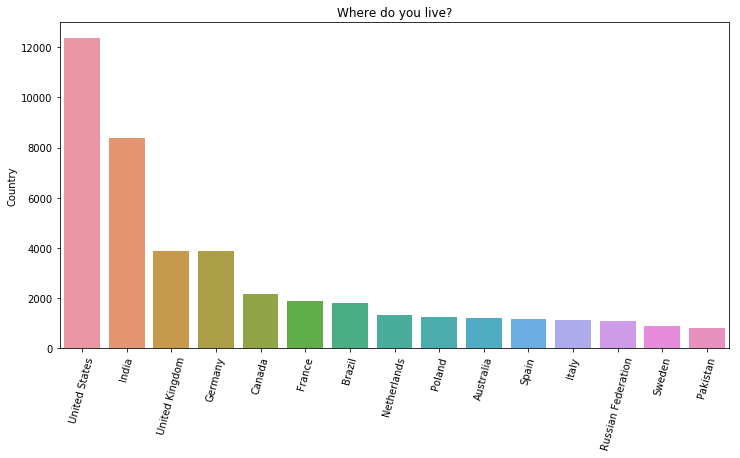

In [53]:
plt.figure(figsize=(12,6))
plt.xticks(rotation =75)
plt.title(schema.Country)
sns.barplot(top_countries.index,top_countries);

It appears that a disproportionality high number of respondents are from USA and india - which one might expect since these countries have the highest populations (apart from China), and since the Survey is in English, which is the common language used by professionals in US, India and UK. We can already see that the survey may not be representative of the entire programming community - especially from non-English speaking countries 

## Age

The distribution of the age of respondents is another important factor to look at, and we can use a histogram to visualize it.

In [54]:
schema.Age

'What is your age (in years)? If you prefer not to answer, you may leave this question blank.'

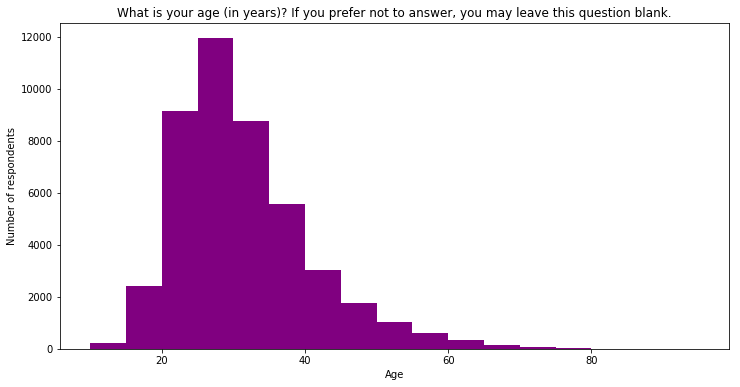

In [55]:
plt.figure(figsize=(12,6))
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survey_df.Age,bins=np.arange(10,100,5),color ='purple');

It appears that a large percentage of respondents are in the age range of 20-45, which is somewhat representative of the programming community in general, a a lot of young people have taken up computer as their field of study or profession in the last 20 years. 

## Gender

In [56]:
schema.Gender

'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.'

In [61]:
gender_counts =survey_df.Gender.value_counts()

In [62]:
gender_counts

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

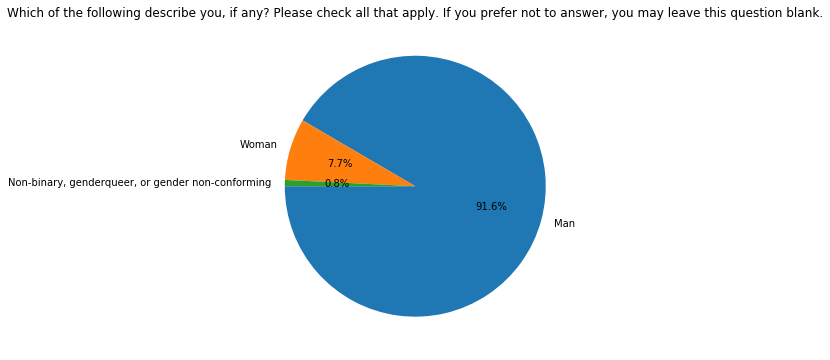

In [63]:
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180);
#The startangle attribute rotates the plot by the specified degrees 
#in counter clockwise direction performed on x-axis of pie chart.

Only about 8% of survey respondents who have answered the question identify as women or non-binary. This number is lower than the overall percentage of women & non-binary genders in the programming community - which is estimated to be around 12%.

## Education Level
Formal education in computer science is often considered an essential requirement for becoming a programmer. However, there are many free resources & tutorials available online to learn programming. Let's compare the education levels of respondents to gain some insight into this. We'll use a horizontal bar plot here.

In [64]:
schema.EdLevel

'Which of the following best describes the highest level of formal education that you’ve completed?'

In [67]:
survey_df.EdLevel.unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', nan,
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Some college/university study without earning a degree',
       'Associate degree (A.A., A.S., etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

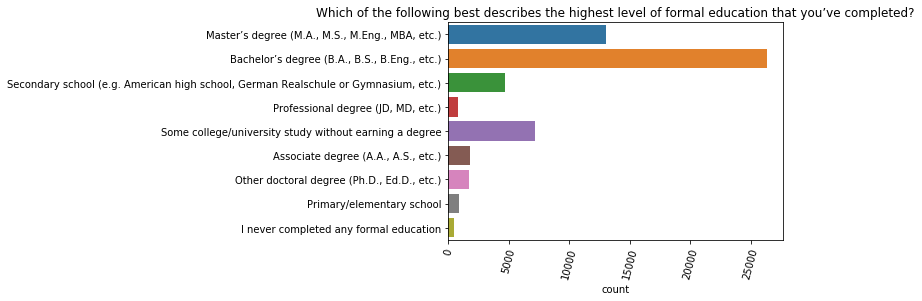

In [66]:
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation=75);
plt.title(schema['EdLevel'])
plt.ylabel(None);

It appears that well over half of the respondents hold a bachelor's or master's degree, so most programmers seem to have some college education. However, it's not clear from this graph alone if they hold a degree in computer science.

Let's also plot undergraduate majors, but this time we'll convert the numbers into percentages and sort the values to make it easier to visualize the order.

In [68]:
schema.UndergradMajor

'What was your primary field of study?'

In [69]:
survey_df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

In [72]:
survey_df.UndergradMajor.count()

50619

In [74]:
survey_df.UndergradMajor.value_counts()/survey_df.UndergradMajor.count()

Computer science, computer engineering, or software engineering                   0.619392
Another engineering discipline (such as civil, electrical, mechanical, etc.)      0.093542
Information systems, information technology, or system administration             0.079832
A natural science (such as biology, chemistry, physics, etc.)                     0.043166
Mathematics or statistics                                                         0.036271
Web development or web design                                                     0.035026
A business discipline (such as accounting, finance, marketing, etc.)              0.027006
A humanities discipline (such as literature, history, philosophy, etc.)           0.019696
A social science (such as anthropology, psychology, political science, etc.)      0.018215
Fine arts or performing arts (such as graphic design, music, studio art, etc.)    0.014125
I never declared a major                                                          0.008850

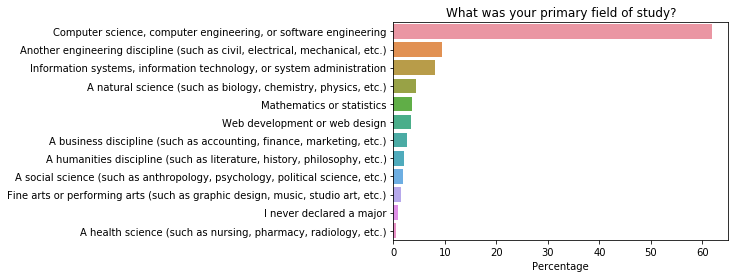

In [73]:
undergrad_pct =survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()
sns.barplot(undergrad_pct,undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Percentage');

It turns out that 40% of programmers holding a college degree have a field of study other than computer science - which is very encouraging. It seems to suggest that while a college education is helpful in general, you do not need to pursue a major in computer science to become a successful programmer.

## Employment
Freelancing or contract work is a common choice among programmers, so it would be interesting to compare the breakdown between full-time, part-time, and freelance work. Let's visualize the data from the Employment column.

In [75]:
schema.Employment

'Which of the following best describes your current employment status?'

Text(0.5, 0, 'Percentage')

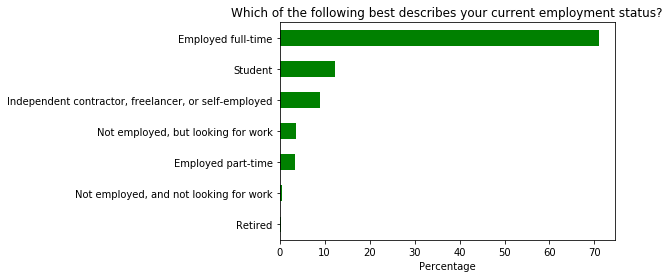

In [76]:
(survey_df.Employment.value_counts(normalize =True,ascending =True)*100).plot(kind='barh', color='g')
# normalize =True gives you the fraction  
plt.title(schema.Employment)
plt.xlabel('Percentage')

It appears that close to 10% of respondents are employed part time or as freelancers.

The DevType field contains information about the roles held by respondents. Since the question allows multiple answers, the column contains lists of values separated by a semi-colon ;, making it a bit harder to analyze directly.

In [77]:
schema.DevType

'Which of the following describe you? Please select all that apply.'

In [80]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                     4396
Developer, back-end                                                                                                                                                                                                                                                                       3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                                                                                                            2214
Developer, back-end;Developer, full-stack                                                                                                  

Let's define a helper function that turns a column containing lists of values (like survey_df.DevType) into a data frame with one column for each possible option.

In [82]:
def split_multicolumn(col_series):
    result_df =col_series.to_frame()
    options=[]
    # Iterate over the column
    for idx, value in col_series[col_series.notnull()].iteritems():
        # Break each value into list of options
        for option in value.split(';'):
        # Add the optionas a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option]=False
        # Mark the value in the option column as True
            result_df.at[idx,option]=True
    return result_df[options]

In [83]:
dev_type_df =split_multicolumn(survey_df.DevType)
dev_type_df
# it seems that the dataframe now has one column for each of the options
# / values provided

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


The dev_type_df has one column for each option that can be selected as a response. If a respondent has chosen an option, the corresponding column's value is True. Otherwise, it is False.

We can now use the column-wise totals to identify the most common roles.

In [84]:
dev_type_totals=dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

As one might expect, the most common roles include "Developer" in the name.